<a href="https://colab.research.google.com/github/prayas99/Assignment/blob/master/Assignment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
xls = pd.ExcelFile('/content/drive/My Drive/IITB Sem5/Data Analyst Assignment (1).xlsx')
df1 = pd.read_excel(xls, 'Assignment-1')
df2 = pd.read_excel(xls, 'Assignment-2')

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno
import warnings
        
def plot_time(df):
    print("\nPlotting numerical data with respect to daily and monthly timedata(if available) : ")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for temp in ['D', 'M']:
                if temp=='D':
                    print("Plotting daily data")
                else:
                    print("Plotting monthly data")
                for col_num in df.select_dtypes('number').columns:
                    df2 = df.copy()
                    df2 = df2.set_index(col)
                    df2T = df2.resample(temp).sum()
                    ax = df2T[[col_num]].plot()
                    plt.show()
                    
def distr_numerical(df):
    print("\nDisplaying statistics of numerical data: ")
    display(df.describe().T)
    print("\n Pairwise jointplots of numerical data: ")
    sns.pairplot(df.select_dtypes(include=np.number))
    plt.show()
    print("\n Correlation Scores plot of numerical data: ")
    sns.heatmap(df.corr(), annot=True,square=True,cmap='magma_r')     
    plt.show()

    
def discription_categorical(df, hue=None):
    print("\nChecking Unique count of non-numeric data:\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    for col in df.select_dtypes(include='object').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def complete_fun(df):        
    df = df.replace(r'^\s*$', np.nan, regex=True)
    print("Sample of data:")
    display(df.head(5))

    print("\nDisplaying characteristics of data:")
    print(df.info())
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(5))
        missingno.matrix(df)
        plt.show()

    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicate datapoints: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated datapoints found")

    discription_categorical(df)
    distr_numerical(df) 
    plot_time(df)

Sample of data:


,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0



Displaying characteristics of data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  16834 non-null  datetime64[ns]
 1   product               16834 non-null  object        
 2   phase                 16834 non-null  object        
 3   campaign_platform     16834 non-null  object        
 4   campaign_type         16834 non-null  object        
 5   communication_medium  16834 non-null  object        
 6   subchannel            16834 non-null  object        
 7   audience_type         16834 non-null  object        
 8   creative_type         16834 non-null  object        
 9   creative_name         16834 non-null  object        
 10  device                16834 non-null  object        
 11  age                   16834 non-null  object        
 12  spends                16834 non-null 

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
2011,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,45-54,3.80,32,1,NaN
2012,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,55-64,0.45,3,0,NaN
2015,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,45-54,7.03,61,1,NaN
2016,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Image,Click,device,55-64,0.28,4,0,NaN
2018,2019-12-16,Product 1,Performance,Facebook Ads,Conversions,Creative,Facebook Ads,Audience 2,Carousal,Carousal,device,35-44,4.53,32,0,NaN


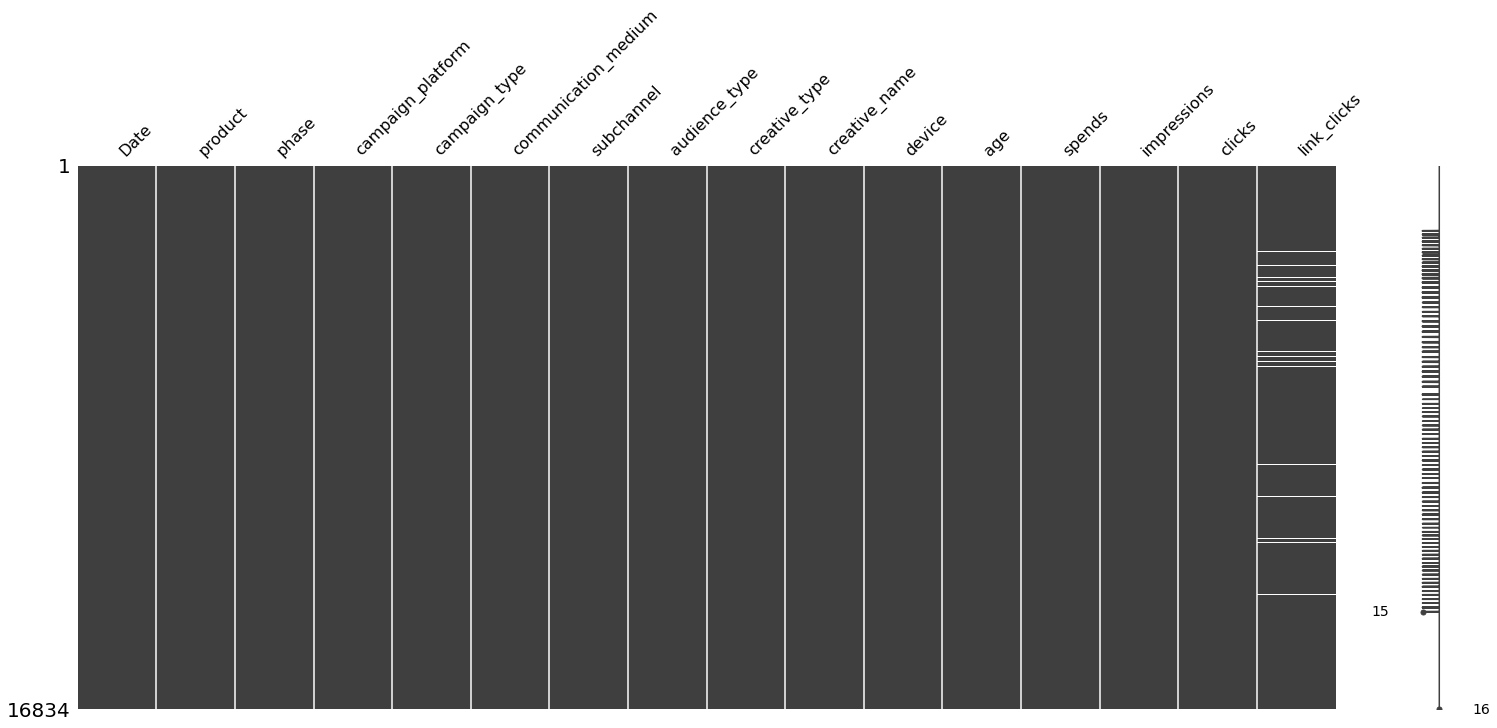


***Number of duplicate datapoints:  205


,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
21,2019-10-19,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,45-54,0.0,1,0,0.0
27,2019-10-19,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,45-54,0.0,1,0,0.0
394,2019-11-09,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,55-64,0.0,1,0,0.0
408,2019-11-09,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,55-64,0.0,1,0,0.0
1279,2019-12-05,Product 1,Performance,Google Ads,Search,Search Keywords,Generic,'-,'-,'-,Tablet,18-24,0.0,1,0,0.0



Checking Unique count of non-numeric data:

product                 1
phase                   1
campaign_platform       2
campaign_type           2
communication_medium    2
subchannel              4
audience_type           4
creative_type           3
creative_name           4
device                  4
age                     7
dtype: int64


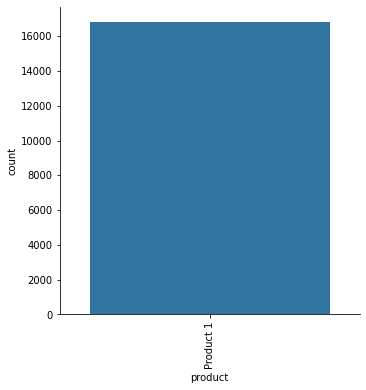

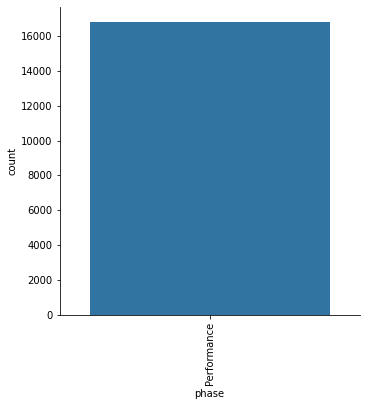

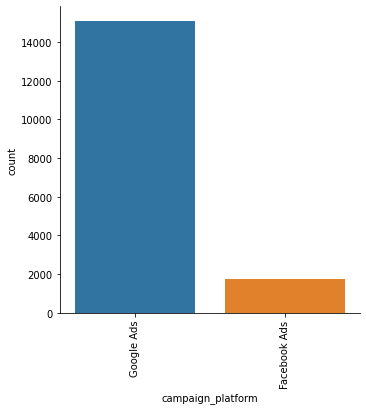

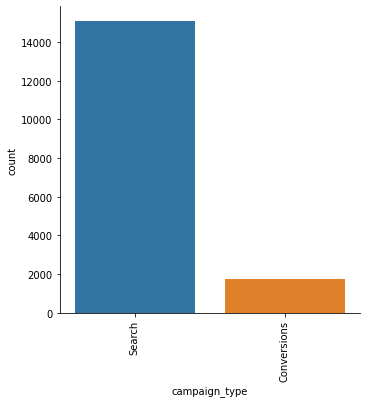

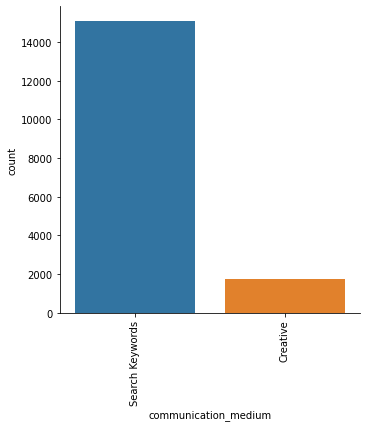

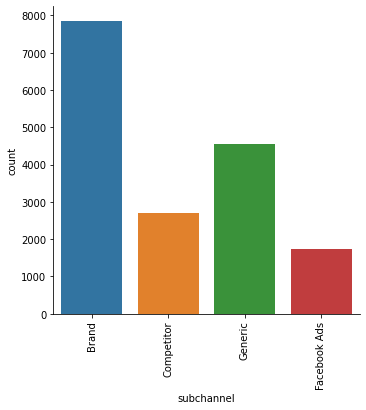

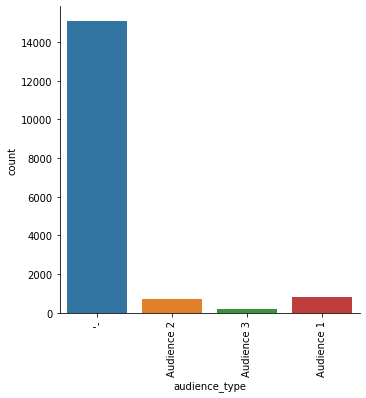

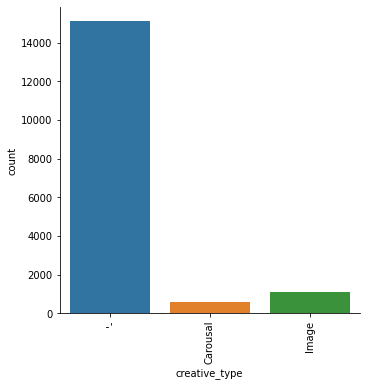

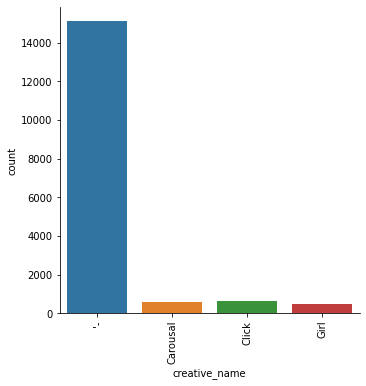

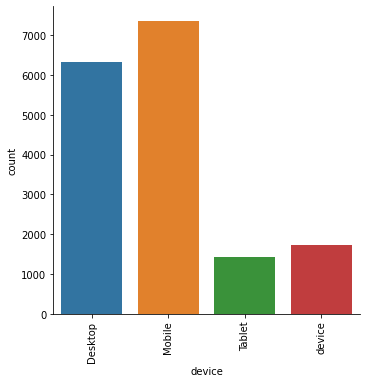

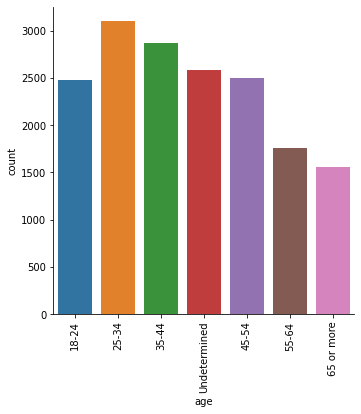


Displaying statistics of numerical data: 


,count,mean,std,min,25%,50%,75%,max
spends,16834.0,148.694236,483.895724,0.0,0.18,22.535,110.02,9221.96
impressions,16834.0,287.959190,2444.450313,0.0,3.00,13.000,64.00,67454.00
clicks,16834.0,11.977783,44.796963,0.0,0.00,2.000,8.00,1075.00
link_clicks,16288.0,2.170371,18.659132,0.0,0.00,0.000,0.00,450.00



 Pairwise jointplots of numerical data: 


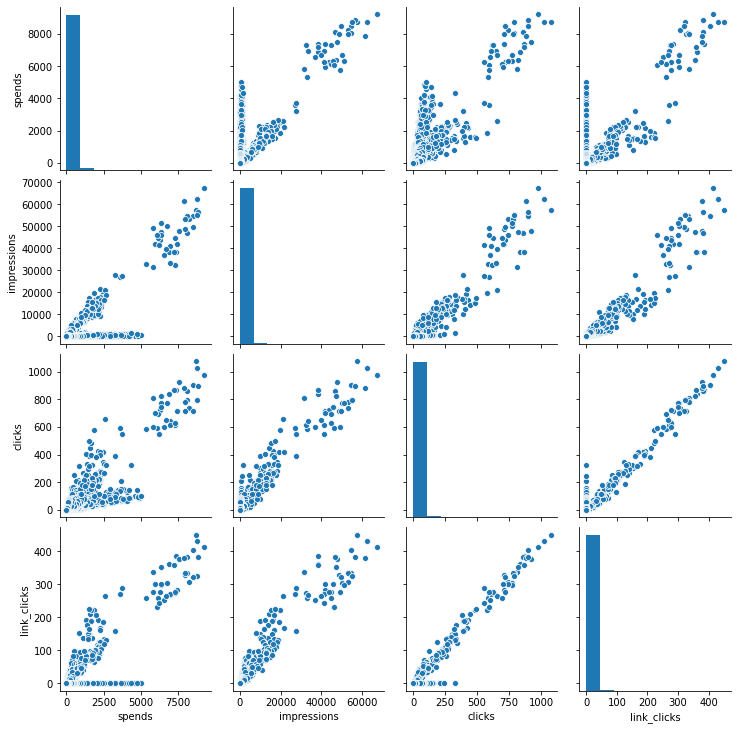


 Correlation Scores plot of numerical data: 


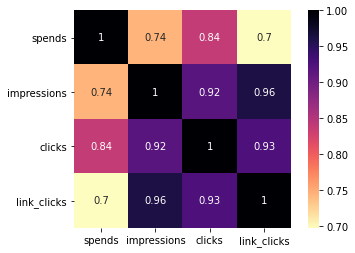


Plotting numerical data with respect to daily and monthly timedata(if available) : 
Plotting daily data


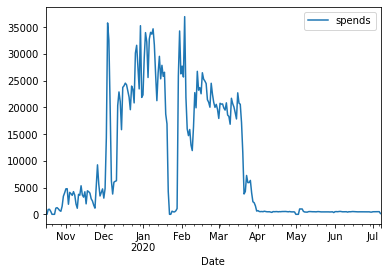

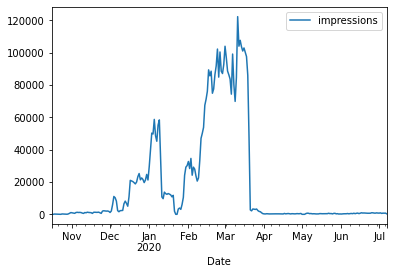

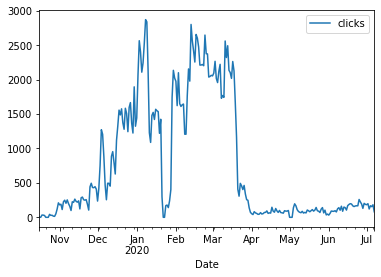

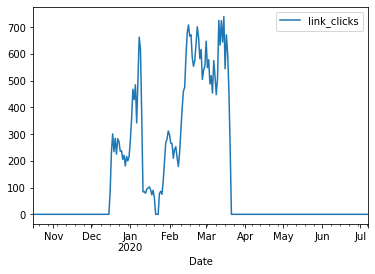

Plotting monthly data


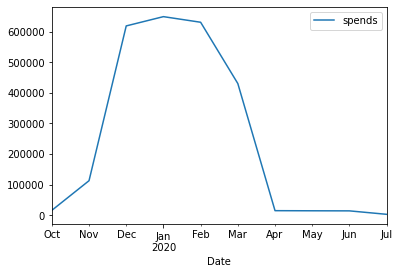

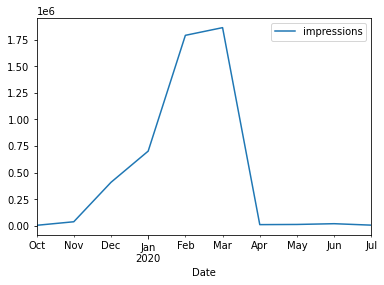

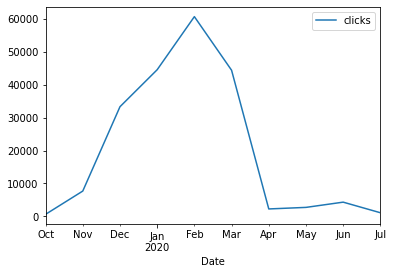

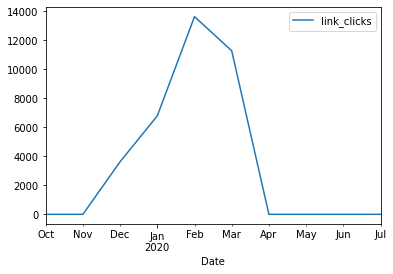

In [7]:
complete_fun(df1.iloc[:,:])


Monthly data:



SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,14013,14017,14018,14019,14119,14121,14301,14501,14601,14616,14706,21011,21022,21066,21077,21452,21485,21496,21598,21780,21791,21984,22546,22740,30373,30453,30828,33001,33127,36165,...,93148BK-1,93373BK-1,93376BK-1,93379BK-1,93481BK-1,93484BK-1,96102GN,96103WH,96104BU,96104GN,96104YW,96105BK,96105BU,96105YW,96106BK,96106BU,96106RD,96106YW,96107RD,PBTM01107,PBTM01207,PBTM02207,PBUM01037,PBUM01057,PBUM01077,PBUM01097,PBUM01127,PBUM01157,PBUM01187,PBUM04307,PPAM05126,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234
Jan,21853,79546,35670,75218,13990,16265,8532,2297,1248,186,634,934,663,2643,1061811,200025,29696,193274,135013,56600,17006,424645,15663,126632,6498,68760,33204,17177,60717,26082,46579,1292,48767,124,264967,15329,181559,14080,1384,14463,...,351,248,316,124,155,62,4187,2887,4723,688,3688,3680,2455,3130,1896,616,1686,710,443,2462,29926,3795,17506,87877,434720,117809,34508,9410,12282,779,1461,1339,388,3281,3499,62,742,311,1567,62
Feb,23170,78095,32029,61235,10517,14922,7193,2001,1154,174,523,964,595,1900,1027646,205214,28948,226516,125035,44763,13662,410454,14989,102805,7050,80710,26807,16958,54082,23937,57867,1073,55675,116,259809,13421,139652,10627,1348,15125,...,334,232,306,116,145,58,3591,2723,4127,787,2788,2247,2449,3168,1870,641,1428,715,473,1764,21998,3079,16118,93478,385283,111051,30900,8942,9380,722,1136,1374,353,2601,4040,58,803,295,1430,58
Mar,30956,92606,30827,72241,9587,18244,8971,1967,949,186,643,1096,728,1879,981781,247820,27232,262417,129766,42821,13772,455783,13985,105282,6967,62208,23673,20791,70892,27863,65911,1096,65074,124,323385,11075,132966,10966,1464,16302,...,382,248,373,124,155,62,3503,2406,4125,837,3324,2128,2603,4060,1721,716,1628,836,470,1434,18295,3484,19158,96675,339461,124191,31859,9934,8738,772,887,1928,330,3107,5874,62,725,320,1458,62
Apr,38202,120947,25062,67543,12110,24042,9115,1800,845,180,728,849,587,1845,901237,260631,24703,217500,114815,44292,14319,439135,11954,121370,6134,48135,20855,20783,97005,29497,59946,1091,67772,120,335803,7695,153698,8827,1651,17606,...,345,240,422,120,150,60,3104,1805,4970,797,3444,2137,2170,4864,1458,537,1654,765,574,1225,15189,3847,19951,80780,305943,121122,34766,10364,9469,637,538,1623,325,2990,7265,60,704,349,984,60
May,44347,135342,22231,57518,9838,33069,10741,1447,1062,186,722,896,678,1564,1021453,283047,22591,249114,102616,40294,18188,454986,11537,124950,5302,35711,22704,19302,111558,30770,54852,1224,74552,124,257085,7767,131334,8354,2181,17662,...,451,248,388,124,155,62,2539,1637,5475,805,3585,1769,2575,4547,1251,451,1834,1141,689,1399,15250,3386,21073,92083,246321,112112,36641,10232,10594,727,358,1332,409,3837,8075,62,797,390,904,62
Jun,49341,157482,24184,53480,9076,22895,8341,1087,1261,180,767,918,753,1198,1052592,327539,21080,228713,119334,32546,19322,549197,9689,116923,4766,28672,22888,17311,150272,22898,52664,1298,75050,120,247814,7370,104950,9086,2426,19524,...,365,240,323,120,150,60,2129,1372,5299,708,3694,1984,2754,4690,890,521,1594,1613,775,1205,15284,2504,18434,78962,202799,78861,42156,9683,9401,775,307,943,363,3708,6403,60,796,342,766,60
Jul,55826,196062,26153,54253,10182,20594,6834,1150,1168,186,1021,1069,915,1423,877107,263521,24321,252025,146275,29352,17050,690912,8726,116316,4467,27433,23300,19787,159940,24872,68638,1209,83228,124,259679,9212,126059,8294,2234,19554,...,395,248,351,124,155,62,2609,1620,5132,718,4366,1695,2706,3982,919,420,1540,1601,882,1122,17516,2278,17442,83811,183663,79265,42803,7338,9122,777,317,975,326,2566,5023,62,698,444,816,62
Aug,41702,69451,27412,46443,10720,31559,19045,1822,1485,186,377,596,475,1275,1029453,86698,46001,131067,162912,77870,23611,732191,23477,174509,2328,50902,47895,26895,115776,33904,38776,2438,58009,124,289635,17331,178426,16134,1875,10089,...,310,248,456,124,155,62,7077,3529,5705,1186,5663,5782,4045,3966,1909,777,1728,850,508,4470,31474,7525,14664,42866,233891,169347,25210,24811,10853,685,822,925,4


Quaterly Data:



SKU,2527,3042,3086,3155,3166,8272,9311,13159,13160,14011,14013,14017,14018,14019,14119,14121,14301,14501,14601,14616,14706,21011,21022,21066,21077,21452,21485,21496,21598,21780,21791,21984,22546,22740,30373,30453,30828,33001,33127,36165,...,93148BK-1,93373BK-1,93376BK-1,93379BK-1,93481BK-1,93484BK-1,96102GN,96103WH,96104BU,96104GN,96104YW,96105BK,96105BU,96105YW,96106BK,96106BU,96106RD,96106YW,96107RD,PBTM01107,PBTM01207,PBTM02207,PBUM01037,PBUM01057,PBUM01077,PBUM01097,PBUM01127,PBUM01157,PBUM01187,PBUM04307,PPAM05126,PPAM05156,PPAM06156,PPAM07156,PPAM08156,PPAM11156,PSTM01257,PSTM01457,WIM5011B,WIM51234
0,78582,131866,59099,88365,21026,67436,36842,3812,3238,366,761,1110,814,2647,2242957,173763,84764,303572,339910,138556,51256,1266435,44599,323790,5399,98932,92012,48030,214317,64755,78496,5082,114520,244,541696,32900,376355,27491,3454,19127,...,632,488,866,244,305,122,14097,6716,11661,2226,10827,11516,7739,7448,3802,1422,3747,1658,969,8142,67511,14033,30772,85127,481222,352818,52376,44088,21761,1348,1636,2136,1058,4661,6172,122,1454,628,5333,122
1,76302,242227,95503,173045,38908,93052,35294,5761,4762,552,1615,2092,1189,5966,3298023,387860,105503,586679,471149,171208,61204,1246088,64541,458346,13159,165601,113036,67275,286608,98641,157081,5615,153246,368,859108,57991,578851,42515,4599,29899,...,1008,736,954,368,460,184,16282,10479,18005,2769,11904,17578,10076,11406,5690,1468,6183,2395,1084,8349,104877,14167,39819,155676,1098819,380290,82082,43823,38521,2017,3319,5004,1735,8605,9675,184,2209,984,5844,184
2,75979,250247,98526,208694,34094,49431,24696,6265,3351,546,1800,2994,1986,6422,3071238,653059,85876,682207,389814,144184,44440,1290882,44637,334719,20515,211678,83684,54926,185691,77882,170357,3461,169516,364,848161,39825,454177,35673,4196,45890,...,1067,728,995,364,455,182,11281,8016,12975,2312,9800,8055,7507,10358,5487,1973,4742,2261,1386,5660,70219,10358,52782,278030,1159464,353051,97267,28286,30400,2273,3484,4641,1071,8989,13413,182,2270,926,4455,182
3,131890,413771,71477,178541,31024,80006,28197,4334,3168,546,2217,2663,2018,4607,2975282,871217,68374,695327,336765,117132,51829,1443318,33180,363243,16202,112518,66447,57396,358835,83165,167462,3613,217374,364,840702,22832,389982,26267,6258,54792,...,1161,728,1133,364,455,182,7772,4814,15744,2310,10723,5890,7499,14101,3599,1509,5082,3519,2038,3829,45723,9737,59458,251825,755063,312095,113563,30279,29464,2139,1203,3898,1097,10535,21743,182,2297,1081,2654,182
4,55826,196062,26153,54253,10182,20594,6834,1150,1168,186,1021,1069,915,1423,877107,263521,24321,252025,146275,29352,17050,690912,8726,116316,4467,27433,23300,19787,159940,24872,68638,1209,83228,124,259679,9212,126059,8294,2234,19554,...,395,248,351,124,155,62,2609,1620,5132,718,4366,1695,2706,3982,919,420,1540,1601,882,1122,17516,2278,17442,83811,183663,79265,42803,7338,9122,777,317,975,326,2566,5023,62,698,444,816,62



Cumulative Sales in all months(in increasing order of sales):



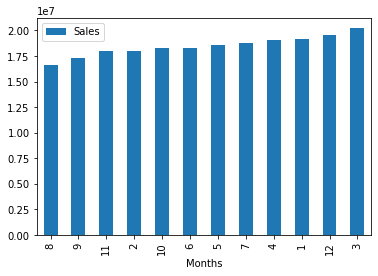


Maximum Sales Months:

March
December
January

Outlier SKUs in all months:

January [14119, 38320, 65001, 65202]
February [14119, 38320, 65001]
March [14119, 38320, 65001]
April [14119, 38320, 65001, 65202]
May [14119, 38320, 65001, 65202]
June [14119, 38194, 38320, 65001, 65202]
July [14119, 21011, 38194, 38320, 65001, 65202]
August [14119, 21011, 38058, 38194, 38320, 38538, 65001, 65202, 65503]
September [14119, 38058, 38194, 38320, 38538, 65001, 65202]
October [14119, 38058, 38194, 38320, 65001, 65202]
November [14119, 38058, 38194, 38320, 65001, 65202]
December [14119, 38058, 38194, 38320, 65001, 65202]


In [15]:
import datetime
import matplotlib.pyplot as plt
import numpy as np

df3 = df2.copy()
df3 = df3.set_index('SKU')
df = df3.copy()
df3 = df3.transpose()
df3.index = pd.to_datetime(df3.index)
df4 = df3.resample('M').sum()
print('\nMonthly data:\n')
df11 = df4.copy()
df11.index = df11.index.strftime('%b')
cats = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
df11.index = pd.CategoricalIndex(df11.index, categories=cats, ordered=True)
df11 = df11.sort_index()
display(df11)
df5 = df3.resample('QS').sum()
print("\nQuaterly Data:\n")
df5.index = df5.index.strftime('%B')
df5 = df5.reset_index(drop=True)
display(df5)
df6 = df4.sum(axis=1)
a = (pd.DatetimeIndex(df6.index).month).values
b = df6.values
df7 = pd.DataFrame({'Months':a, 'Sales':b})
df7 = df7.sort_values(by=['Sales'])
print("\nCumulative Sales in all months(in increasing order of sales):\n")
df7.plot('Months', 'Sales', kind='bar')
plt.show()
print("\nMaximum Sales Months:\n")
idx = df4.sum(axis=1).sort_values(ascending=False).head(3).index
a = (pd.DatetimeIndex(idx).month).values
for i in a:
  monthinteger = i
  month = datetime.date(1900, monthinteger, 1).strftime('%B')
  print (month)
print("\nOutlier SKUs in all months:\n")
df8 = df4.copy()
df8.index = df8.index.strftime('%B')
df8 = df8.transpose()
df9 = df8.mask((df8 - df8.mean()).abs() > 2 * df8.std())
is_NaN = df9.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df9[row_has_NaN]

df10 = (rows_with_NaN)
df10 = df10.sort_index(axis=1)
columns = list(df10) 
d={}
for i in columns: 
  long_month_name = i
  datetime_object = datetime.datetime.strptime(long_month_name, "%B")
  month_number = datetime_object.month
  index = df10[i].index[df10[i].apply(np.isnan)]
  d[month_number]= list(index.values)
items = d.items()
sorted_items = sorted(items)
sorted_items
for i in range(len(d)):
  monthinteger = i+1
  month = datetime.date(1900, monthinteger, 1).strftime('%B')
  print (month,d[i+1])